# Netflix Data Analysis

Let's analyse a dataframe with data about Netflix films and series.

## 1. Importations and loading data

In [1]:
# libraries
import pandas as pd

# data visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# loading data
netflix_df = pd.read_csv('data/data_netflix.csv')

In [16]:
netflix_df.head(5)

,title,director,actors,country,release_year,rating,duration,year_added,month_added,day_added,genres,budget,color
0,7:19,Jorge Michel Grau,100,Mexico,2016,20.0,93,2016,12,23,Dramas,237000000.0,Color
1,23:59,Gilbert Chan,122,Singapore,2011,45.0,78,2018,12,20,Horror,300000000.0,Color
2,9,Shane Acker,111,United,2009,55.0,80,2017,11,16,Action,245000000.0,Color
3,21,Robert Luketic,133,United,2008,75.0,123,2020,1,1,Dramas,250000000.0,Color
4,122,Yasir Al Yasiri,128,Egypt,2019,80.0,95,2020,6,1,Horror,250000000.0,Color


## 2. First check on the data frame

In [17]:
netflix_df.shape

(5377, 13)

In [18]:
netflix_df.columns

Index(['title', 'director', 'actors', 'country', 'release_year', 'rating',
       'duration', 'year_added', 'month_added', 'day_added', 'genres',
       'budget', 'color'],
      dtype='object')

In [19]:
# what is color column? If the film is in color or in B&W.

netflix_df['color'].unique()

array(['Color', ' Black and White'], dtype=object)

In [20]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         5377 non-null   object 
 1   director      5214 non-null   object 
 2   actors        5377 non-null   int64  
 3   country       5147 non-null   object 
 4   release_year  5377 non-null   int64  
 5   rating        5377 non-null   float64
 6   duration      5377 non-null   int64  
 7   year_added    5377 non-null   int64  
 8   month_added   5377 non-null   int64  
 9   day_added     5377 non-null   int64  
 10  genres        5377 non-null   object 
 11  budget        4891 non-null   float64
 12  color         5377 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 546.2+ KB


In [22]:
netflix_df.describe().round()

,actors,release_year,rating,duration,year_added,month_added,day_added,budget
count,5377.0,5377.0,5377.0,5377.0,5377.0,5377.0,5377.0,4.891000e+03
mean,70.0,2013.0,56.0,99.0,2018.0,7.0,12.0,4.107288e+07
std,37.0,10.0,34.0,29.0,1.0,4.0,10.0,1.990100e+08
min,10.0,1942.0,0.0,3.0,2008.0,1.0,1.0,2.180000e+02
25%,38.0,2012.0,20.0,86.0,2018.0,3.0,1.0,7.000000e+06
50%,67.0,2016.0,70.0,98.0,2019.0,7.0,11.0,2.100000e+07
75%,103.0,2018.0,80.0,114.0,2020.0,10.0,20.0,5.000000e+07
max,133.0,2021.0,100.0,312.0,2021.0,12.0,31.0,1.221550e+10


First insights:
   - Each row in this data frame is related to a film. 
   - Films are added to Netflix from 2008 to 2021. 
   - The rating can go from 0 to 100. 
   - The dates columns don't have date type. I will need to change it.
   - Minimum duration of 3 minutes?

## 3. Changing data types

In [23]:
# change the data type in the dates columns --> No because they work like categories.

## 4. Nulls

In [24]:
netflix_df.isnull().sum() # if you use count, is not correct.

title             0
director        163
actors            0
country         230
release_year      0
rating            0
duration          0
year_added        0
month_added       0
day_added         0
genres            0
budget          486
color             0
dtype: int64

It seems that there are some fils without director, country or budget. Let's see if is a problem or not. 

In [25]:
netflix_df[netflix_df['director'].isnull()]

,title,director,actors,country,release_year,rating,duration,year_added,month_added,day_added,genres,budget,color
14,'89,NaN,99,United,2017,80.0,87,2018,5,16,Sports,215000000.0,Color
41,100 Days Of Solitude,NaN,120,Spain,2018,0.0,93,2018,7,6,Documentaries,200000000.0,Color
43,100 Things to do Before High School,NaN,113,United,2014,100.0,44,2019,11,2,Movies,200000000.0,Color
51,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,124,NaN,2017,100.0,37,2017,1,26,Movies,200000000.0,Color
64,2015 Dream Concert,NaN,103,South,2015,75.0,107,2017,4,28,International,180000000.0,Color
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,We Are All For The Fatherland,NaN,92,Lebanon,1979,47.0,74,2020,11,11,Documentaries,50000000.0,Color
5313,Ya no estoy aquí: Una conversación entre Guill...,NaN,91,NaN,2020,10.0,15,2020,11,3,Documentaries,50000000.0,Color
5321,Yeh Hai Bakrapur,NaN,99,India,2014,20.0,95,2018,11,1,Comedies,50000000.0,Color
5330,Yoko and His Friends,NaN,70,Russia,2015,14.0,78,2018,6,23,Children,50000000.0,Color


I guess is normal that some productions don't have director because also they seem to have a short duration. Check this hypothesis.

In [26]:
netflix_df[netflix_df['country'].isnull()]

,title,director,actors,country,release_year,rating,duration,year_added,month_added,day_added,genres,budget,color
51,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,124,NaN,2017,100.0,37,2017,1,26,Movies,200000000.0,Color
76,3 Deewarein,Nagesh Kukunoor,133,NaN,2003,95.0,121,2019,12,31,Dramas,175000000.0,Color
93,5 Cowok Jagoan,Anggy Umbara,12,NaN,2017,100.0,106,2019,1,5,Action,165000000.0,Color
144,A Go! Go! Cory Carson Halloween,"Alex Woo, Stanley Moore",13,NaN,2020,100.0,22,2020,10,2,Children,149000000.0,Color
145,A Go! Go! Cory Carson Summer Camp,"Stanley Moore, Alex Woo",37,NaN,2020,80.0,21,2020,8,4,Children,150000000.0,Color
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5313,Ya no estoy aquí: Una conversación entre Guill...,NaN,91,NaN,2020,10.0,15,2020,11,3,Documentaries,50000000.0,Color
5332,Yoo Byung Jae: Too Much Information,Yoo Byung-jae,90,NaN,2018,50.0,63,2018,3,16,Stand-Up,50000000.0,Color
5345,Your Excellency,Funke Akindele,74,NaN,2019,38.0,120,2020,7,10,Comedies,48000000.0,Color
5361,Zero Hour,Robert O. Peters,68,NaN,2018,44.0,89,2019,12,13,International,1000000.0,Color


## 5. Outliers

In [27]:
# outliers

## 6. Questions and visualizations

- Understanding what content is available in different countries
- Identifying similar content by matching text-based features
- Network analysis of Actors / Directors and find interesting insights
- Does Netflix has more focus on TV Shows than movies in recent years.

### 6.1. Create a barplot and show how many movies we have per 'genres'

In [28]:
films_by_genres = netflix_df.groupby('genres', as_index=False)['title'].count().sort_values(by='title', ascending=False)

In [29]:
films_by_genres

,genres,title
7,Dramas,1384
4,Comedies,1074
6,Documentaries,751
0,Action,721
2,Children,502
16,Stand-Up,321
8,Horror,245
10,International,114
3,Classic,77
11,Movies,56


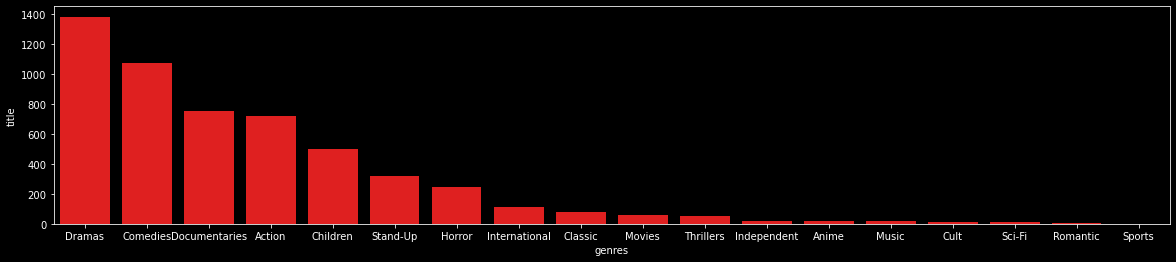

In [34]:
fig = plt.subplots(figsize=(20,4))
ax = sns.barplot(data=films_by_genres, x='genres', y='title', color='red')
plt.style.use("dark_background")

### 6.2. Create the previous bar plot horizontally. Only with the type of movies "Comedies", "Action","Horror" and "Thriller". 

In [72]:
filter_genres_netflix = netflix_df.loc[netflix_df.genres.isin(["Comedies", "Action","Horror", "Thriller"]), :]

In [73]:
# another way
#netflix_df[netflix_df.genres.isin(["Comedies", "Action","Horror", "Thriller"])]

In [74]:
filter_genres_netflix.head(5)

,title,director,actors,country,release_year,rating,duration,year_added,month_added,day_added,genres,budget,color
1,23:59,Gilbert Chan,122,Singapore,2011,45.0,78,2018,12,20,Horror,300000000.0,Color
2,9,Shane Acker,111,United,2009,55.0,80,2017,11,16,Action,245000000.0,Color
4,122,Yasir Al Yasiri,128,Egypt,2019,80.0,95,2020,6,1,Horror,250000000.0,Color
6,706,Shravan Kumar,110,India,2019,5.0,118,2019,4,1,Horror,258000000.0,Color
7,1920,Vikram Bhatt,115,India,2008,50.0,143,2017,12,15,Horror,260000000.0,Color


### 6.3. Create a barplot to show how much was the total "budget" per "genres".

In [77]:
budget_by_genres = netflix_df.groupby('genres', as_index=False)['budget'].sum().sort_values(by='budget', ascending=False)

In [79]:
budget_by_genres # try to have the number without abbreviation

,genres,budget
7,Dramas,5.560657e+10
4,Comedies,3.694414e+10
0,Action,3.383758e+10
6,Documentaries,2.445682e+10
2,Children,1.547843e+10
16,Stand-Up,1.192336e+10
8,Horror,8.311981e+09
10,International,6.197112e+09
3,Classic,2.185890e+09
11,Movies,1.785642e+09


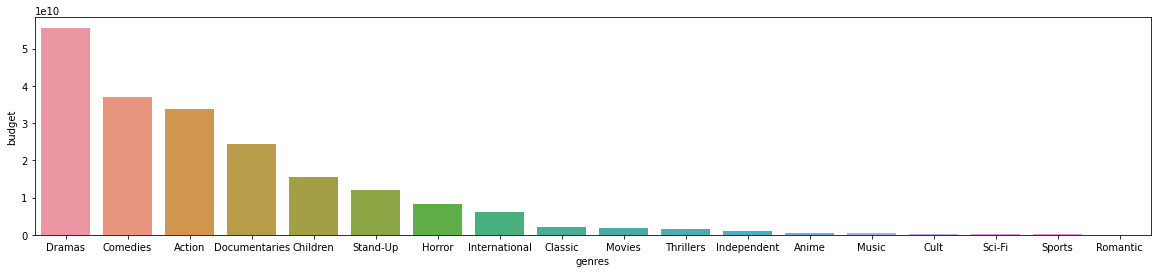

In [78]:
fig = plt.subplots(figsize=(20,4))
ax = sns.barplot(data=budget_by_genres, x='genres', y='budget')

The genre in which Netflix invested more budget during these years is Dramas but it was also the most produced genre. 

It will be the same if we use the mean instead sum?

In [80]:
budget_by_genres_mean = netflix_df.groupby('genres', as_index=False)['budget'].mean().sort_values(by='budget', ascending=False)

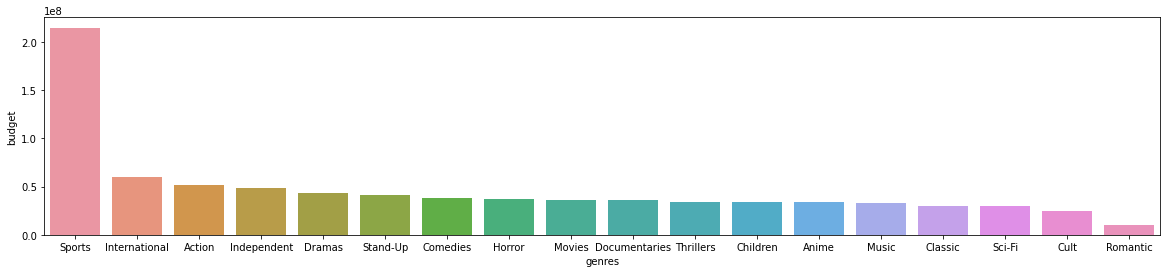

In [81]:
fig = plt.subplots(figsize=(20,4))
ax = sns.barplot(data=budget_by_genres_mean, x='genres', y='budget')

The results are completely different using the mean budget vs the total one. The Sports shows are the less produced by Netflix but the most expensive ones. 